<a href="https://colab.research.google.com/github/scarebats/Machine-Learning-2025/blob/main/JS11_2341720047_AHMAD%20NAUFAL%20ILHAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 1**




In [75]:
# Langkah 1 - Import Library
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

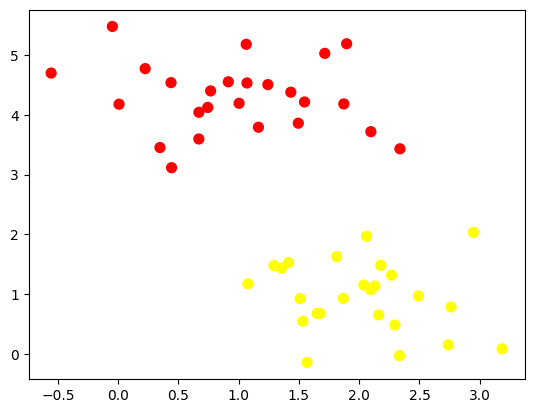

In [76]:
# Langkah 2 - Membuat Data Dummy
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

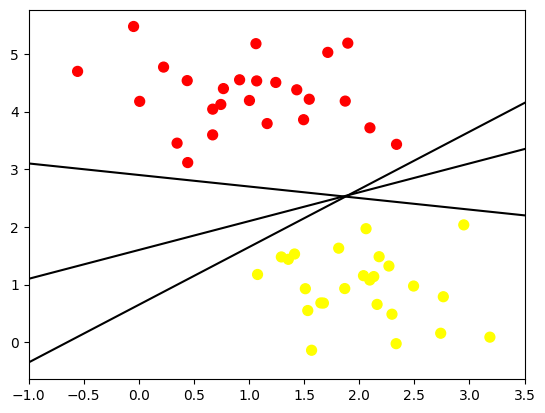

In [77]:
# Langkah 3 - Buat Ilustrasi Garis Pemisah
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    # Removed plt.fill_between to remove the shadow

plt.xlim(-1, 3.5)


(-1.0, 3.5)

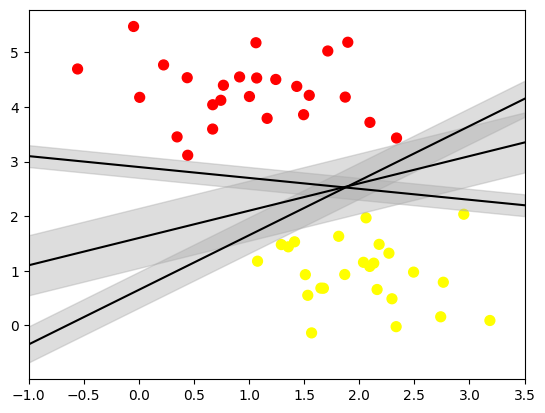

In [78]:
# Langkah 4 - Ilustrasi Margin
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [79]:
# Langkah 5 - Fitting Model
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [80]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

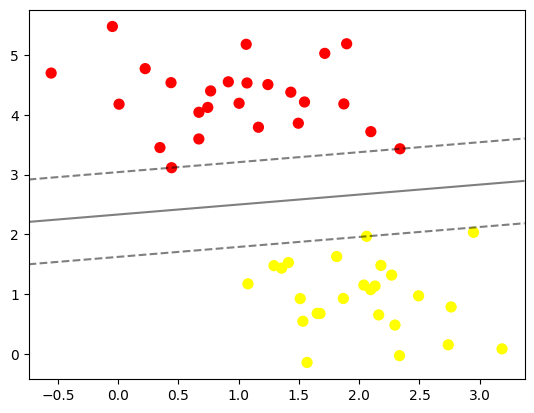

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [82]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

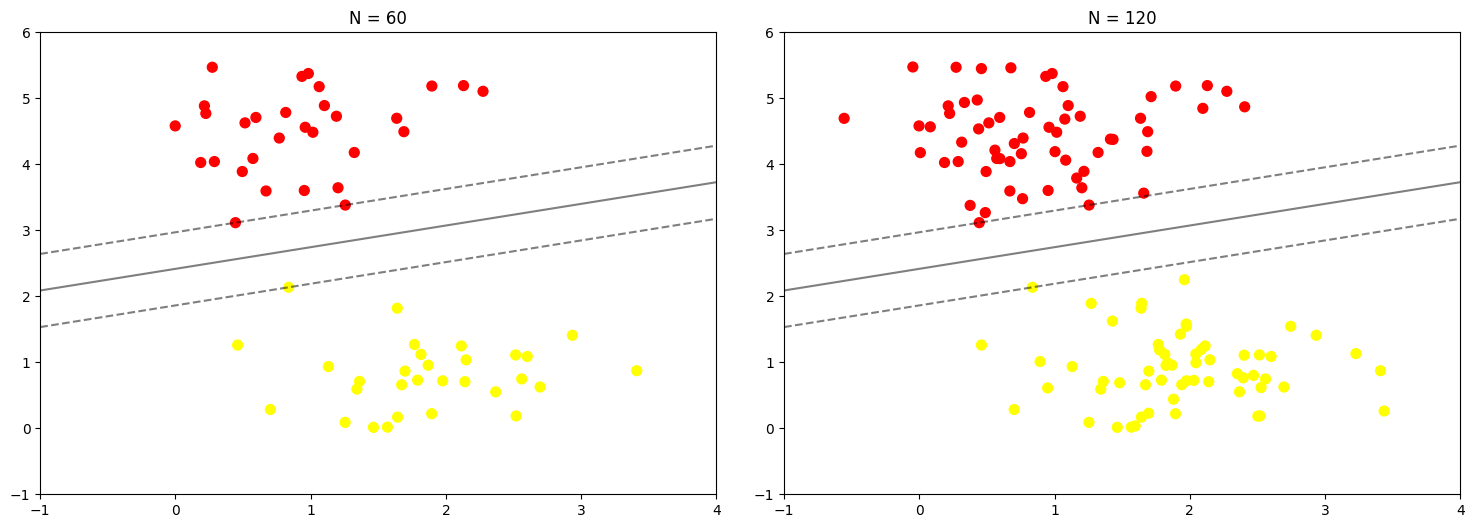

In [83]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [84]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [85]:
!pip install ipywidgets

# **PRAKTIKUM 2**

In [86]:
# Langkah 1 - Ilustrasi Data Non-Linier
# Langkah 1a - Import Library
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [87]:
# Langkah 1b - Buat Kembali Fungsi Plotting
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

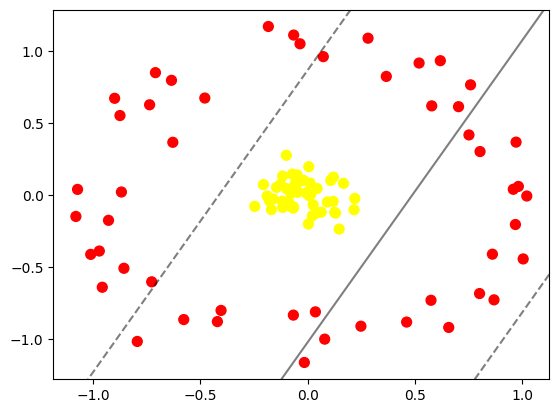

In [88]:
# Langkah 1c - Buat Data Dummy Non-Linier
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [89]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = np.exp(-(X ** 2).sum(1)) # Define r here, for example, using a radial basis function
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.08040375, -0.14958908],
       [ 0.57860872,  0.61811652],
       [-0.11637016, -0.08649197],
       [ 1.00487608, -0.44440537],
       [-0.09830179,  0.04394933],
       [ 0.57516038, -0.73142603],
       [-0.04930799,  0.13880429],
       [-0.40363967, -0.80191442],
       [ 0.16729653,  0.08043743],
       [ 0.06305878, -0.11969866],
       [ 0.07300645,  0.95977387],
       [ 0.8689461 , -0.72840639],
       [ 0.11876635, -0.04488928],
       [-0.24642521, -0.07939503],
       [-0.62855367,  0.36535318],
       [-0.95736624, -0.64093193],
       [-0.08811704, -0.05227619],
       [ 0.1471722 , -0.23688821],
       [ 0.07955978, -1.00117464],
       [-0.63476457,  0.79557367],
       [-1.07269778,  0.03832371],
       [-0.70950741,  0.84877011],
       [ 0.00352667, -0.20166892],
       [ 0.24840795, -0.91128212],
       [-0.17804063, -0.03902705],
       [-0.02485069,  0.09886767],
       [ 0.80378308,  0.30100383],
       [-0.57761894, -0.86527066],
       [ 0.21990818, -0.02451562],
       [-0.97124083, -0.38946857],
       [ 0.00531967,  0.19591258],
       [-0.18856089, -0.00785319],
       [ 0.01496217,  0.00502559],
       [-0.0355761 ,  1.0490678 ],
       [ 0.861455  , -0.4114765 ],
       [ 0.28161703,  1.08791873],
       [-0.05758299,  0.07887904],
       [ 0.46155661, -0.88264899],
       [-0.06560845, -0.08387601],
       [-0.0153818 , -1.1632024 ],
       [-0.04002111,  0.10574457],
       [-0.05181145,  0.0733413 ],
       [-0.07823684,  0.0104485 ],
       [-0.87494161,  0.55104624],
       [ 0.10800304,  0.10058363],
       [-0.06656681, -0.83436479],
       [ 0.98246524,  0.05897882],
       [-0.16885102, -0.10193391],
       [ 0.12622258, -0.12123518],
       [ 0.70358503,  0.61258633],
       [-0.06500393,  1.10966263],
       [ 0.96869773, -0.2055475 ],
       [ 0.00658252, -0.00468772],
       [-0.06733322,  0.03391733],
       [ 0.04401669,  0.04451384],
       [ 0.1200695 ,  0.12373068],
       [-0.01935403,  0.10142316],
       [-0.09918038,  0.27512048],
       [ 0.216464  , -0.10308527],
       [ 1.02178729, -0.0075313 ],
       [ 0.80151055, -0.68463635],
       [-0.00437169,  0.01348395],
       [ 0.13018845, -0.12625637],
       [-0.11795321, -0.04300445],
       [-0.89973735,  0.67071415],
       [-0.06765035, -0.09165224],
       [ 0.03619569, -0.81180086],
       [ 0.04173575, -0.12574952],
       [-0.92833171, -0.17638723],
       [ 0.75208552,  0.41637109],
       [-0.73676706,  0.62567598],
       [-0.12639366,  0.07210975],
       [ 0.01131963,  0.08242156],
       [-0.07121737,  0.14409664],
       [-0.04576244,  0.01824098],
       [ 0.36676986,  0.82261028],
       [-0.47938087,  0.67249057],
       [-0.11664896,  0.13102816],
       [-0.005145  ,  0.01558934],
       [ 0.61865281,  0.93166127],
       [-0.04483826,  0.10723456],
       [ 0.97176058,  0.36654438],
       [-1.01126077, -0.41268753],
       [-0.18315659,  1.16928387],
       [-0.79420281, -1.01719566],
       [ 0.02227261, -0.1448693 ],
       [ 0.02556247, -0.06870532],
       [ 0.95880185,  0.03911235],
       [ 0.519634  ,  0.91550859],
       [-0.14500416,  0.05227883],
       [ 0.65788055, -0.92002705],
       [-0.72700996, -0.60325339],
       [-0.42072868, -0.87931383],
       [-0.8564898 , -0.50926968],
       [ 0.09206697, -0.049541  ],
       [-0.86814302,  0.02026905],
       [-0.08573623, -0.07646644],
       [ 0.75962593,  0.76416789],
       [-0.16102739, -0.0281748 ],
       [-0.20615988,  0.07155474]]), y=array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]))>

In [90]:
# Langkah 2 - Fitting Model
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

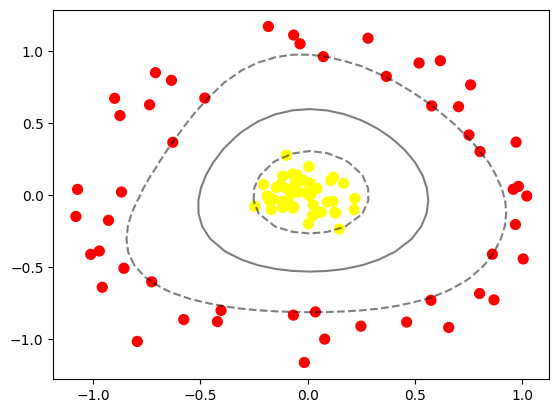

In [91]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# **PRAKTIKUM 3**

In [92]:
# Langkah 1 - Import Library dan Buat Fungsi Plotting
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [93]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

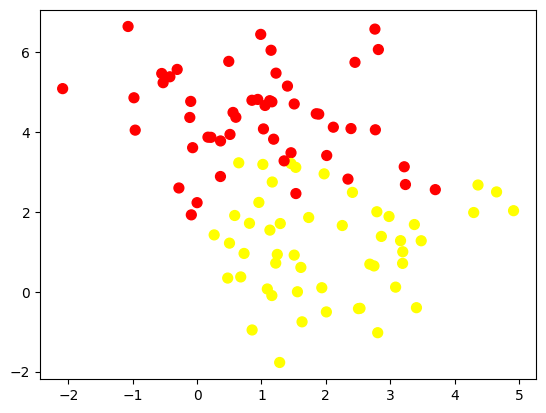

In [94]:
# Langkah 2 - Buat Data Dummy
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

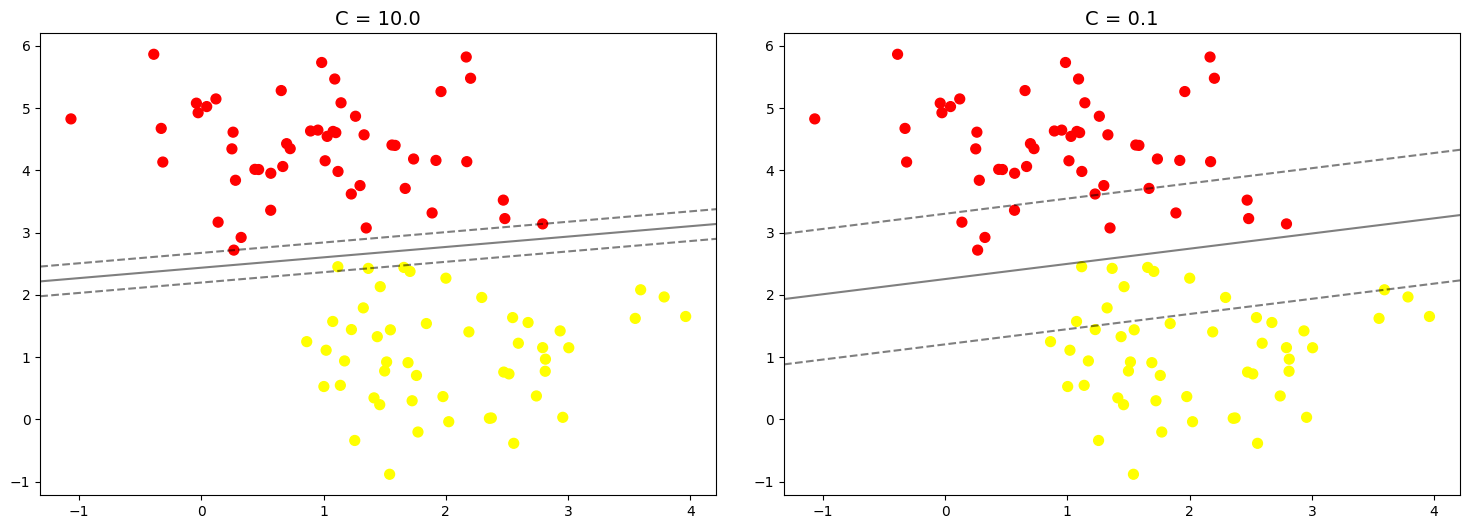

In [95]:
# Langkah 3 - Analisis Dampak Tunning
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **PRAKTIKUM 4**

In [96]:
# Langkah 0 - Unduh Dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


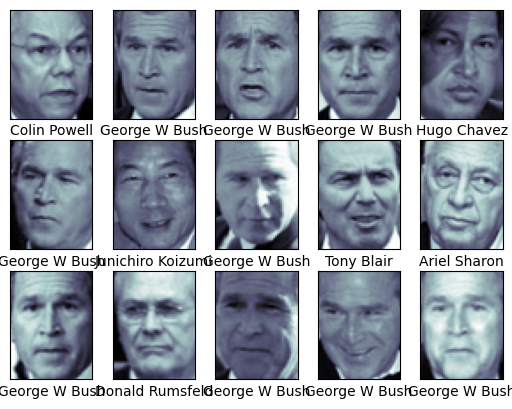

In [97]:
# Langkah 1 - Inspeksi Citra Wajah
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [98]:
# Langkah 2 - Pra Pengolahan Data
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [99]:
# Langkah 3 - Split Data
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [100]:
# Langkah 4 - Pembuatan Model + Tunning
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 15s, sys: 177 ms, total: 2min 15s
Wall time: 1min 47s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [101]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

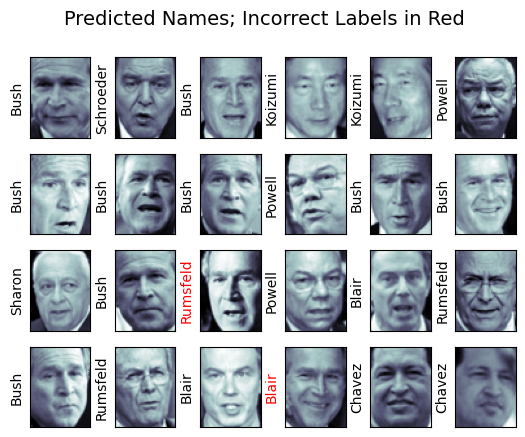

In [102]:
# Langkah 5 - Cek Hasil Prediksi
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [103]:
# Langkah 6 - Cek Performansi
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

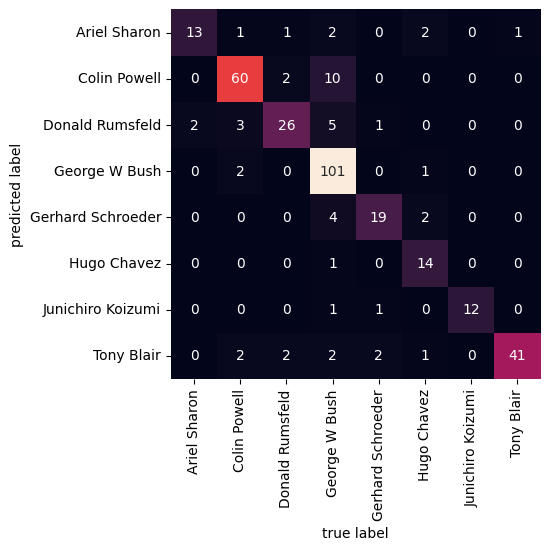

In [104]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **PRAKTIKUM 5**

In [105]:
# Langkah 0 - Import Library
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
# Extract the zip file
import zipfile
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/dataset/images.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

In [107]:
# Langkah 1 - Load Data dan Visualisasikan
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [108]:
# Load training data
train_img = load_dataset(train_dir)

In [109]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        [[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        [[241, 246, 249],
         [201, 206, 209],
         [204, 209, 212],
         ...,
         [179, 185, 185],
         [179, 185, 185],
         [179, 185, 185]],
 
        ...,
 
        [[ 30,  27,  10],
         [ 25,  24,   6],
         [ 24,  21,   4],
         ...,
         [ 23,  24,   8],
         [ 23,  24,   8],
         [ 24,  25,   9]],
 
        [[ 24,  22,   7],
         [ 21,  19,   4],
         [ 20,  18,   3],
         ...,
         [ 23,  24,   8],
         [ 23,  24,   8],
         [ 23,  24,   8]],
 
        [[ 17,  18,   4],
         [ 15,  16,   2],
         [ 15,  16,   2],
         ...,
         [ 23,  24,  10],
  

In [110]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 210
(458, 800, 3)


In [111]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: day


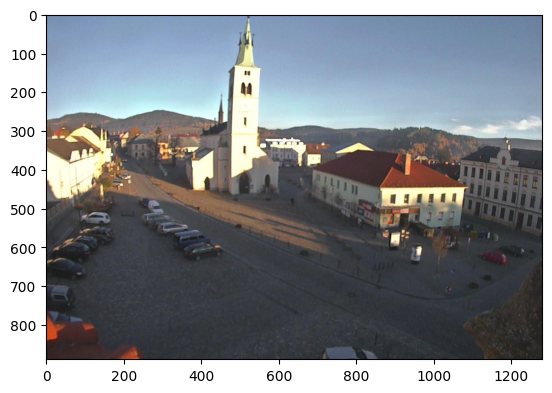

In [112]:
random_img_viz(train_img)

In [113]:
# Langkah 3 - Pra Pengolahan Data
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [114]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [115]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [116]:
train_std_img_list = preprocess(train_img)

In [117]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 57
(600, 1100, 3)


In [118]:
# Langkah 4 - Ekstraksi Fitur
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 81
Avg Brighness: 198.0956


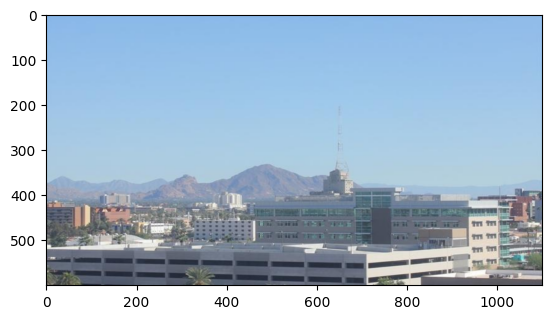

In [119]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [120]:
# Langkah 5 - Klasifikasi dengan Metode Threshold
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 178
Actual label: 0
Predicted label: 0


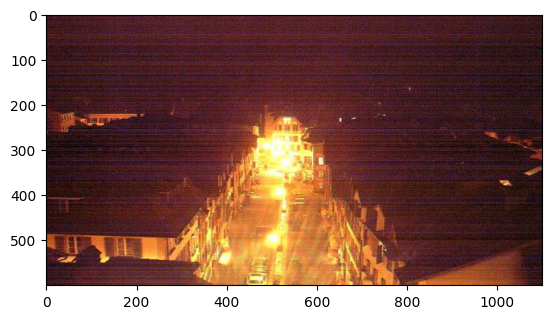

In [121]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [122]:
# Langkah 6 - Evaluasi Manual
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [123]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [124]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [125]:
# Langkah 4 Alternatif - Membuat Feature Vectors.
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [126]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,157.021297,1.0
1,158.018809,1.0
2,137.345858,1.0
3,143.662879,1.0
4,110.086635,1.0


In [127]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,129.938794,1.0
1,154.042817,1.0
2,105.001747,1.0
3,157.660683,1.0
4,98.868853,1.0


In [128]:
# Langkah 5 - Buat Model SVM
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [129]:
# Langkah 6 - Evaluasi
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# **TUGAS PRAKTIKUM**
1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

- Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
  - Gunakan model dengan kernel linier.
  - Gunakan model dengan kernel polynomial.
  - Gunakan model dengan kernel RBF.
- Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.


In [130]:
# Langkah 1 - Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
# Langkah 2 - Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_25/dataset/voice.csv'

df = pd.read_csv(file_path)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [132]:
# Langkah 3 - Memisahkan Fitur dan Label + Label Encoding
X = df.drop('label', axis=1)
y = df['label']

le = LabelEncoder()
y = le.fit_transform(y)  # male=1, female=0


In [133]:
# Langkah 4 - Standarisasi Fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [134]:
# Langkah 5 - Fungsi Evaluasi Model SVM
def evaluate_svm(test_size, kernel):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [135]:
# Langkah 6 - Evaluasi Model Berdasarkan Split dan Kernel
results = []
splits = [(0.30, "70:30"), (0.20, "80:20")]
kernels = ["linear", "poly", "rbf"]

for test_size, split_label in splits:
    for k in kernels:
        acc = evaluate_svm(test_size, k)
        results.append([split_label, k, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["Split", "Kernel", "Accuracy"])
results_df

,Split,Kernel,Accuracy
0,70:30,linear,0.9790
1,70:30,poly,0.9590
2,70:30,rbf,0.9832
3,80:20,linear,0.9748
4,80:20,poly,0.9574
5,80:20,rbf,0.9826


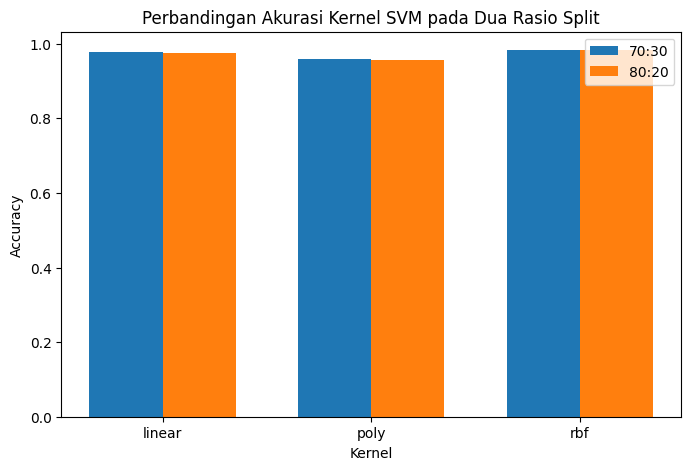

In [136]:
# Langkah 7 - Visualisasi Perbandingan Akurasi
plt.figure(figsize=(8,5))

kernels = ["linear", "poly", "rbf"]
acc_70 = results_df[results_df["Split"]=="70:30"]["Accuracy"].values
acc_80 = results_df[results_df["Split"]=="80:20"]["Accuracy"].values

x = np.arange(len(kernels))
width = 0.35

plt.bar(x - width/2, acc_70, width, label="70:30")
plt.bar(x + width/2, acc_80, width, label="80:20")

plt.xticks(x, kernels)
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.title("Perbandingan Akurasi Kernel SVM pada Dua Rasio Split")
plt.legend()
plt.show()

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [137]:
# Langkah 1 - Import Library
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Langkah 2 - Menentukan Path Dataset
root = Path("images")

In [147]:
# Langkah 3 - Fungsi Load Gambar & Ekstraksi Fitur Histogram (Channel V HSV)
def load_images_and_labels(root):
    data = []
    for folder in ["training/day", "training/night", "test/day", "test/night"]: # Corrected 'tes' to 'test'
        label = 1 if "day" in folder else 0
        for img_path in (root / folder).glob("*.jpg"):
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (100, 100))
            hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            hist = cv2.calcHist([hsv], [2], None, [256], [0,256]).flatten()
            data.append((hist, label))
    return data

dataset = load_images_and_labels(root)
len(dataset)

400

In [148]:
# Langkah 4 - Memisahkan Fitur dan Label serta Melakukan Train-Test Split (80:20)
X = np.array([d[0] for d in dataset])
y = np.array([d[1] for d in dataset])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((320, 256), (80, 256))

In [149]:
# Langkah 5 - Hyperparameter Tuning SVM RBF
results = []

C_values = [1, 10, 100]
gamma_values = [0.1, 0.01, 0.001]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([C, gamma, round(acc, 4)])

results_df = pd.DataFrame(results, columns=["C", "gamma", "Accuracy"])
results_df

,C,gamma,Accuracy
0,1,0.100,0.5
1,1,0.010,0.5
2,1,0.001,0.5
3,10,0.100,0.5
4,10,0.010,0.5
5,10,0.001,0.5
6,100,0.100,0.5
7,100,0.010,0.5
8,100,0.001,0.5


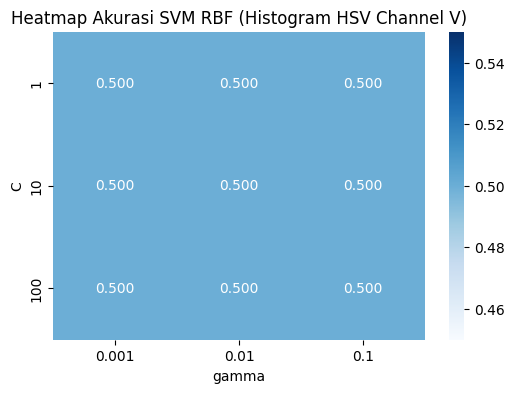

In [150]:
# Langkah 6 - Visualisasi Hasil dalam Heatmap
pivot_table = results_df.pivot(index="C", columns="gamma", values="Accuracy")

plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".3f")
plt.title("Heatmap Akurasi SVM RBF (Histogram HSV Channel V)")
plt.show()